# House Price Kaggle
- **Features**:
    - `MSSubClass`: The building class
    - `MSZoning`: The general zoning classification
    - `LotFrontage`: Linear feet of street connected to property
    - `LotArea`: Lot size in square feet
    - `Street`: Type of road access
    - `Alley`: Type of alley access
    - `LotShape`: General shape of property
    - `LandContour`: Flatness of the property
    - `Utilities`: Type of utilities available
    - `LotConfig`: Lot configuration
    - `LandSlope`: Slope of property
    - `Neighborhood`: Physical locations within Ames city limits
    - `Condition1`: Proximity to main road or railroad
    - `Condition2`: Proximity to main road or railroad (if a second is present)
    - `BldgType`: Type of dwelling
    - `HouseStyle`: Style of dwelling
    - `OverallQual`: Overall material and finish quality
    - `OverallCond`: Overall condition rating
    - `YearBuilt`: Original construction date
    - `YearRemodAdd`: Remodel date
    - `RoofStyle`: Type of roof
    - `RoofMatl`: Roof material
    - `Exterior1st`: Exterior covering on house
    - `Exterior2nd`: Exterior covering on house (if more than one material)
    - `MasVnrType`: Masonry veneer type
    - `MasVnrArea`: Masonry veneer area in square feet
    - `ExterQual`: Exterior material quality
    - `ExterCond`: Present condition of the material on the exterior
    - `Foundation`: Type of foundation
    - `BsmtQual`: Height of the basement
    - `BsmtCond`: General condition of the basement
    - `BsmtExposure`: Walkout or garden level basement walls
    - `BsmtFinType1`: Quality of basement finished area
    - `BsmtFinSF1`: Type 1 finished square feet
    - `BsmtFinType2`: Quality of second finished area (if present)
    - `BsmtFinSF2`: Type 2 finished square feet
    - `BsmtUnfSF`: Unfinished square feet of basement area
    - `TotalBsmtSF`: Total square feet of basement area
    - `Heating`: Type of heating
    - `HeatingQC`: Heating quality and condition
    - `CentralAir`: Central air conditioning
    - `Electrical`: Electrical system
    - `1stFlrSF`: First Floor square feet
    - `2ndFlrSF`: Second floor square feet
    - `LowQualFinSF`: Low quality finished square feet (all floors)
    - `GrLivArea`: Above grade (ground) living area square feet
    - `BsmtFullBath`: Basement full bathrooms
    - `BsmtHalfBath`: Basement half bathrooms
    - `FullBath`: Full bathrooms above grade
    - `HalfBath`: Half baths above grade
    - `Bedroom`: Number of bedrooms above basement level
    - `Kitchen`: Number of kitchens
    - `KitchenQual`: Kitchen quality
    - `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
    - `Functional`: Home functionality rating
    - `Fireplaces`: Number of fireplaces
    - `FireplaceQu`: Fireplace quality
    - `GarageType`: Garage location
    - `GarageYrBlt`: Year garage was built
    - `GarageFinish`: Interior finish of the garage
    - `GarageCars`: Size of garage in car capacity
    - `GarageArea`: Size of garage in square feet
    - `GarageQual`: Garage quality
    - `GarageCond`: Garage condition
    - `PavedDrive`: Paved driveway
    - `WoodDeckSF`: Wood deck area in square feet
    - `OpenPorchSF`: Open porch area in square feet
    - `EnclosedPorch`: Enclosed porch area in square feet
    - `3SsnPorch`: Three season porch area in square feet
    - `ScreenPorch`: Screen porch area in square feet
    - `PoolArea`: Pool area in square feet
    - `PoolQC`: Pool quality
    - `Fence`: Fence quality
    - `MiscFeature`: Miscellaneous feature not covered in other categories
    - `MiscVal`: $Value of miscellaneous feature
    - `MoSold`: Month Sold
    - `YrSold`: Year Sold
    - `SaleType`: Type of sale
    - `SaleCondition`: Condition of sale
- **Target variables**
    - `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **Metrics**:  `Root-Mean-Squared-Error (RMSE)` between the logarithm of the predicted value and the logarithm of the observed sales price. 
    - (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from pathlib import Path

Pipeline to note:
- Drop columns which presents > 40% of missing data in the training set: `['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']`
- Take log the target 


## 1. Data Loading

In [61]:
DATA_PATH = Path("__file__").resolve().parents[3] / "data" / "house-prices-kaggle"
df = pd.read_csv(DATA_PATH / "train.csv", index_col=0)

In [62]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
df.shape

(1460, 80)

## 2. Sanity Check

### Missing / Null values

In [64]:
#missing data
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260


In [65]:
col_to_drops = missing_data[missing_data.Percent > 0.4].index.to_list()
print(col_to_drops)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']


In [66]:
#Showing missing data at which index of the data
# fig, ax = plt.subplots(figsize=(15,10)) 
# sns.heatmap(df.isna().transpose(), ax=ax)
# plt.show()

In [67]:
df = df.drop(col_to_drops, axis=1)

In [68]:
target_col = 'SalePrice'

# Select numeric columns only
numerical_cols = [col for col in df.select_dtypes(include=np.number).columns.drop(target_col)]
print(f"Numerical Features  : {numerical_cols}")
# Categorical columns in the training data
categorical_cols = [col for col in df.select_dtypes(exclude=np.number).columns]
print(f"Categorical Features: {categorical_cols}")

Numerical Features  : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Categorical Features: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'Gar

- Numerical Features  : `['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']`
    - **TODO**: need to identify Numerical (Discrete) Features
- Categorical Features: `['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']`
- Target Columns: `SalePrice`

### Duplication

In [69]:
df.duplicated().sum()

0

## 3. EDA

In [70]:
def plot_dist(df, xlabel='SalePrice', take_log=False):
    data = np.log1p(df[xlabel]) if take_log else df[xlabel]
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(data, bins=40, ax=ax1,  kde=True)
    ax1.set(title='Histogram', ylabel='Frequency', xlabel=xlabel)
    # skewness and kurtosis
    print(f"Skewness: {data.skew():.3f}")
    print(f"Kurtosis: {data.kurt():.3f}")
    #Get also the QQ-plot
    stats.probplot(data, plot=ax2)
    ax2.set_title('Q-Q Plot')
    plt.show()

### Target Variable `SalePrice`
- Observation: Right Skew

Skewness: 1.883
Kurtosis: 6.536


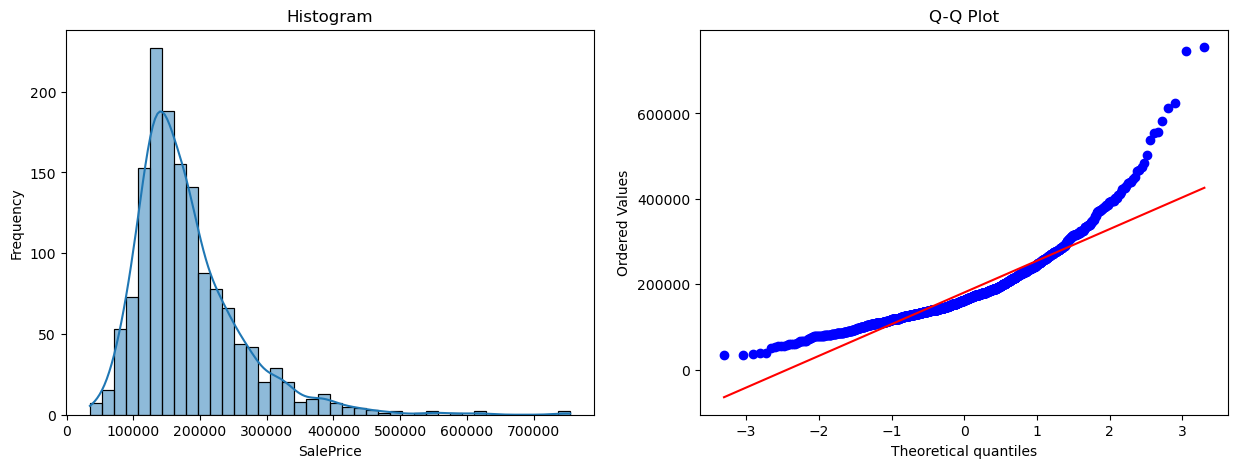

In [71]:
plot_dist(df, xlabel='SalePrice')

Skewness: 0.121
Kurtosis: 0.810


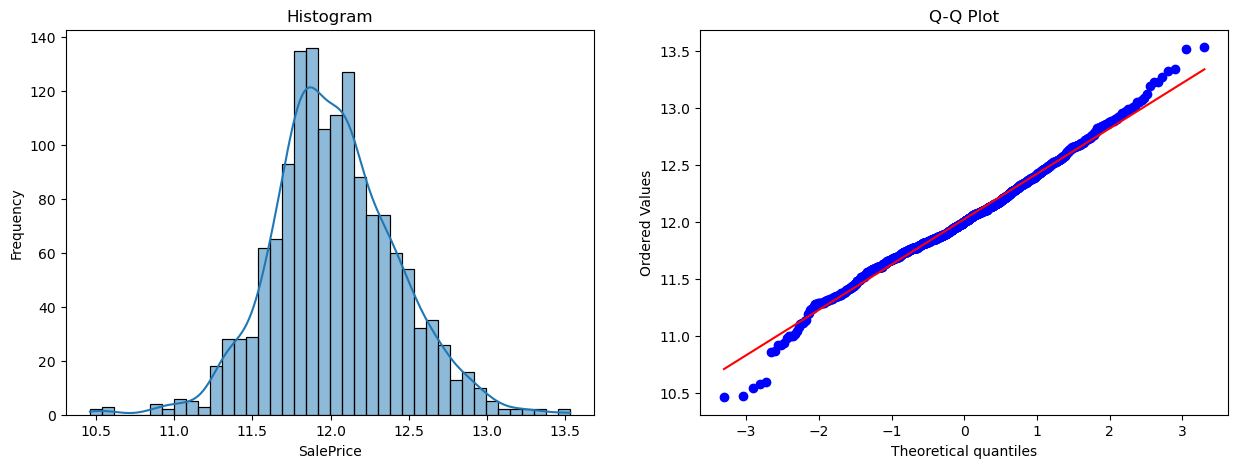

In [72]:
plot_dist(df, xlabel='SalePrice', take_log=True)

In [79]:
df['SalePrice'] = df['SalePrice'].apply(np.log1p) # take log the target for better correlation

### Numerical Features 

#### Skewness

In [74]:
need_log_cols = []
for col in numerical_cols:
    skew, kurt = df[col].skew(), df[col].kurt()
    if np.abs(skew) > 2 or np.abs(kurt) > 7:
        need_log_cols.append(col)
        print(f"{col:15} Skewness: {skew:5.2f},   Kurtosis: {kurt:5.2f}")

LotFrontage     Skewness:  2.16,   Kurtosis: 17.45
LotArea         Skewness: 12.21,   Kurtosis: 203.24
MasVnrArea      Skewness:  2.67,   Kurtosis: 10.08
BsmtFinSF1      Skewness:  1.69,   Kurtosis: 11.12
BsmtFinSF2      Skewness:  4.26,   Kurtosis: 20.11
TotalBsmtSF     Skewness:  1.52,   Kurtosis: 13.25
LowQualFinSF    Skewness:  9.01,   Kurtosis: 83.23
BsmtHalfBath    Skewness:  4.10,   Kurtosis: 16.40
KitchenAbvGr    Skewness:  4.49,   Kurtosis: 21.53
OpenPorchSF     Skewness:  2.36,   Kurtosis:  8.49
EnclosedPorch   Skewness:  3.09,   Kurtosis: 10.43
3SsnPorch       Skewness: 10.30,   Kurtosis: 123.66
ScreenPorch     Skewness:  4.12,   Kurtosis: 18.44
PoolArea        Skewness: 14.83,   Kurtosis: 223.27
MiscVal         Skewness: 24.48,   Kurtosis: 701.00


#### Correlation Matrix (Relationship with Target)

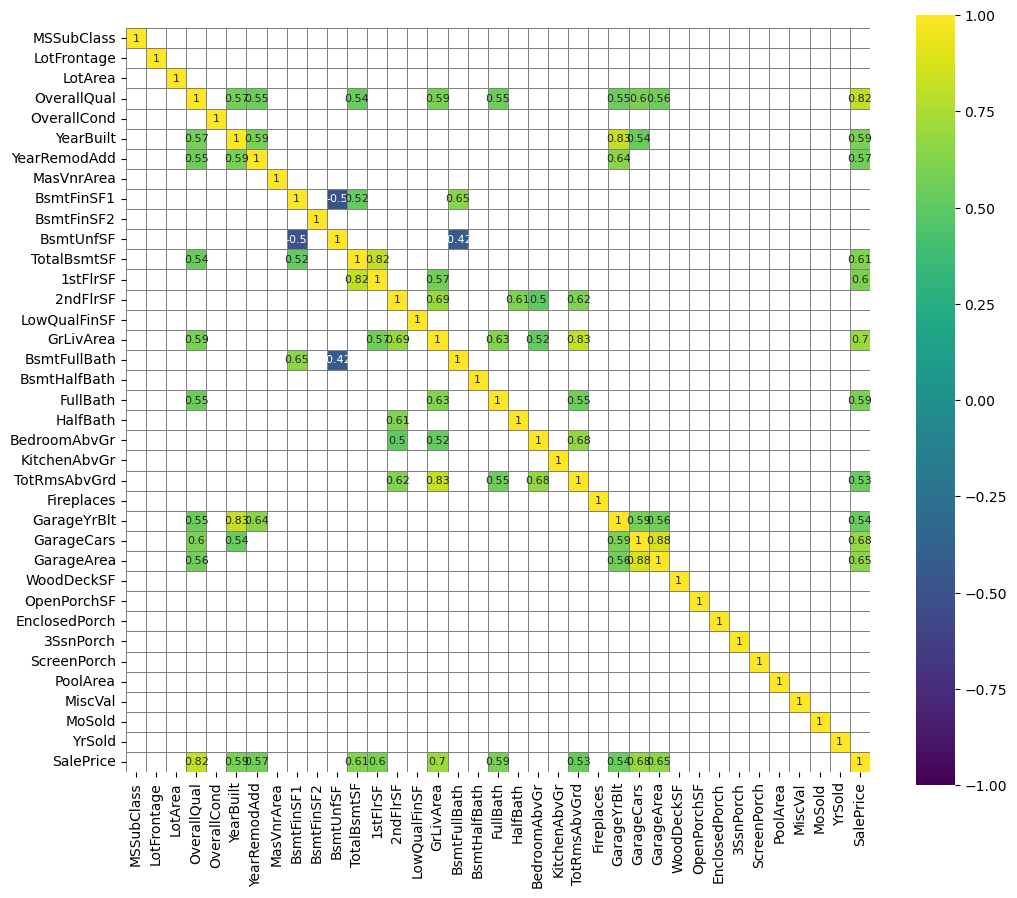

In [97]:
corr = df.corr(numeric_only=True) # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))


sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.5, linecolor='grey',
            annot=True, annot_kws={"size": 8}, square=True);

In [98]:
golden_feature_list = corr['SalePrice'].apply(np.abs) \
                                        .sort_values(ascending=False) \
                                        .loc[lambda x : x>=0.399] \
                                        .index \
                                        .to_list()[1:]

In [99]:
print(golden_feature_list)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea']


- This `golden_feature_list` is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:
    - Plot the numerical features and see which ones have very few or explainable outliers
    - Remove the outliers from these features and see which one can have a good correlation without their outliers
- For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.



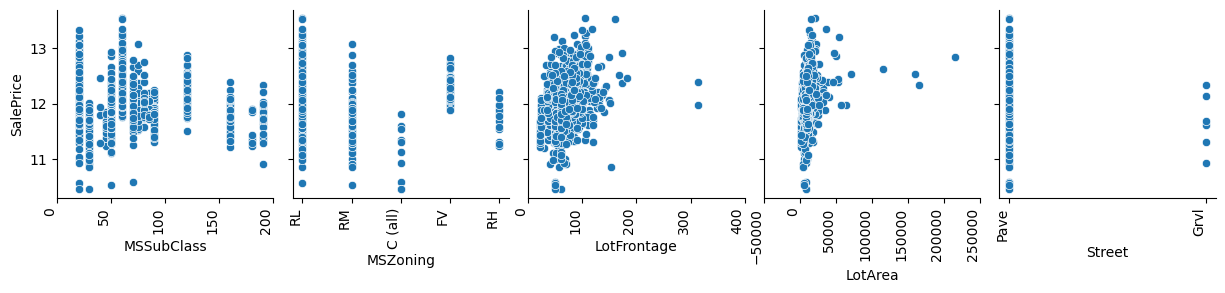

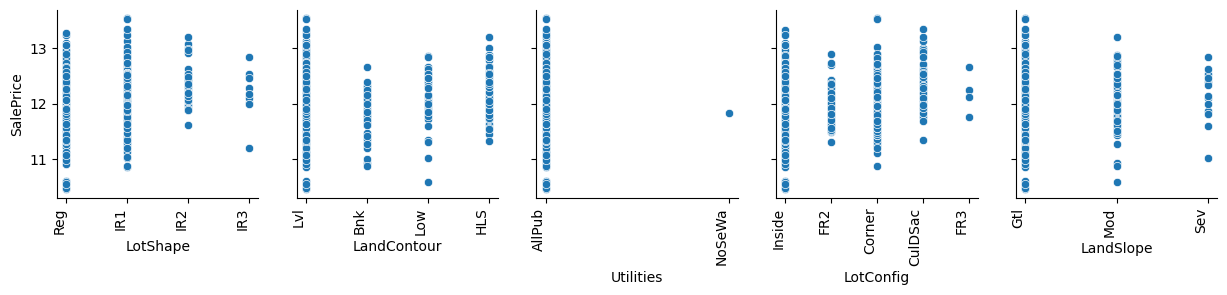

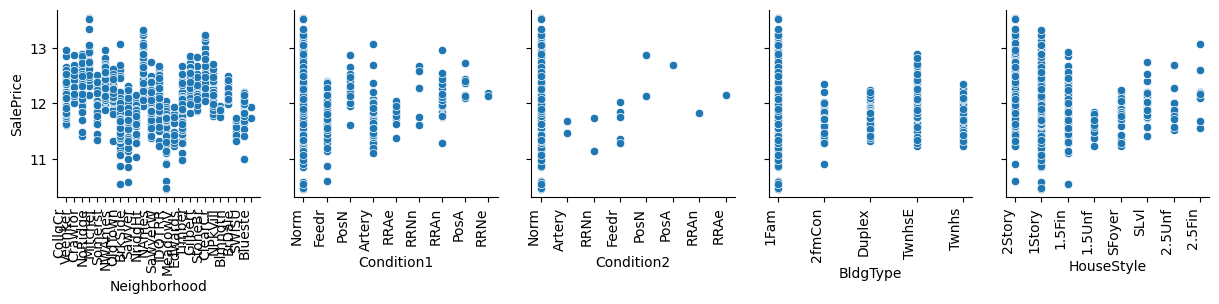

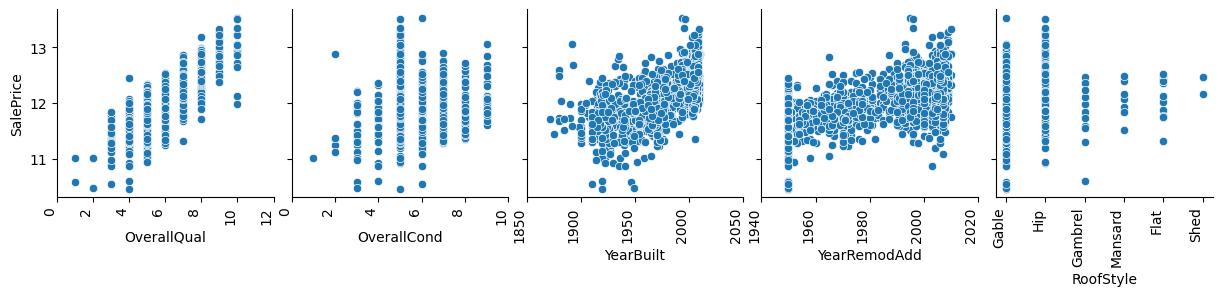

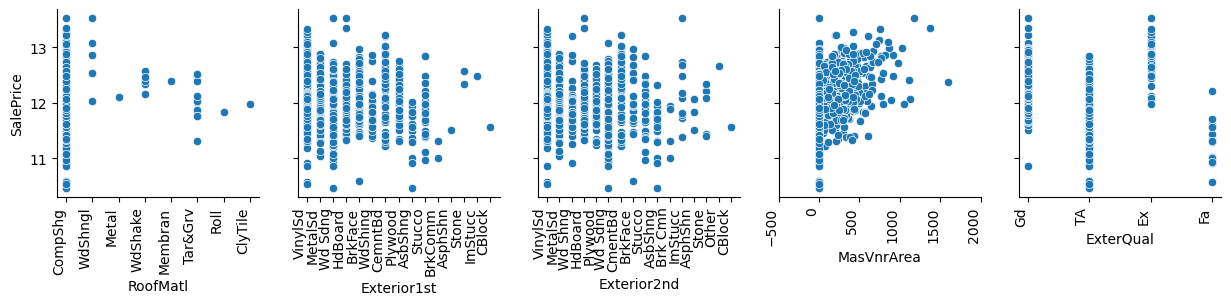

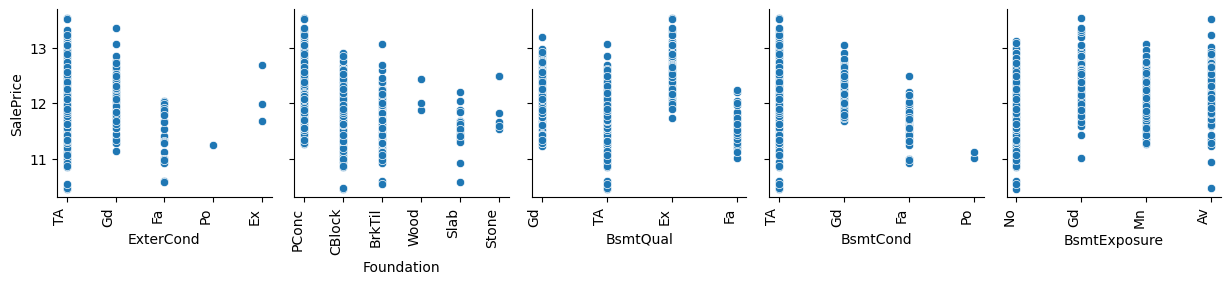

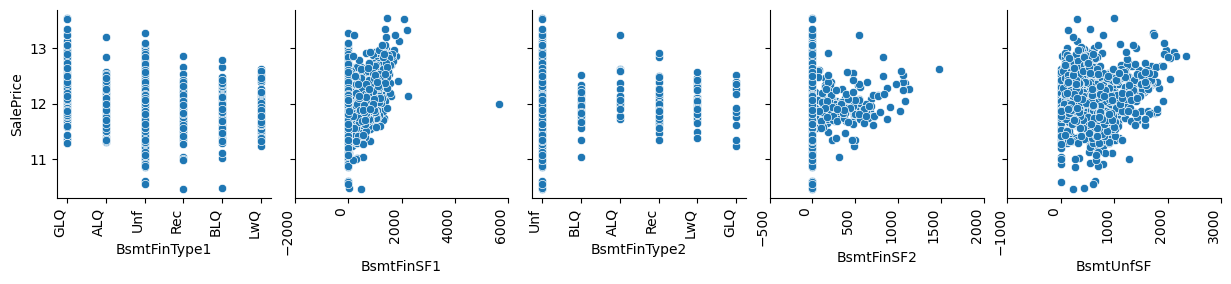

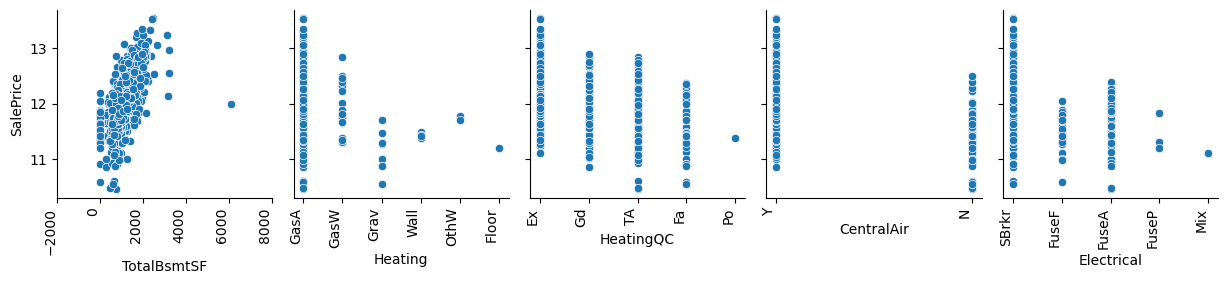

In [104]:
for i in range(0, len(numerical_cols), 5):
    g = sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['SalePrice'])
    for ax in g.axes.flatten():
        # rotate x axis labels
        ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90, ha='right')
